In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [63]:
x1='1.jpg'
image = cv2.imread(x1,0)
image1 = cv2.imread(x1,1)
x,y=image.shape
median = cv2.GaussianBlur(image,(11,11),0)
median1 = cv2.GaussianBlur(image,(21,21),0)
a=median1-median
c=255-a


thresh1 = cv2.adaptiveThreshold(c,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
thresh1 = cv2.bitwise_not(thresh1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 4))
dilation = cv2.erode(thresh1,kernel,iterations = 1)

contours,hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
t=len(contours[:])

for u in range(0,t-1):
    if (np.size(contours[u])>100):
        ellipse = cv2.fitEllipse(contours[u])
        (center,axes,orientation) = ellipse
        majoraxis_length = max(axes)
        minoraxis_length = min(axes)
        eccentricity=(np.sqrt(1-(minoraxis_length/majoraxis_length)**2))
        if (eccentricity<0.75):
            cv2.drawContours(image1, contours, u, (255,1,255), 3)
# cv2.imwrite('marked.jpg',image1)

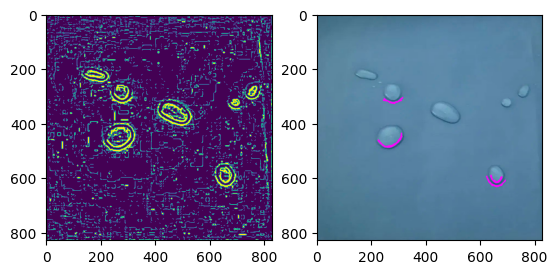

In [64]:
fig, ax = plt.subplots(1,2)
kernel=np.ones((2,2),np.uint8)
ax[0].imshow(thresh1)
ax[1].imshow(image1)